# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no ‘log’ e um polinômio. Escolha o melhor modelo.

In [4]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [8]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  total_bill
          1              1             1     2       16.99
          1              0             1     3       10.34
          1              0             1     3       21.01
          1              0             1     2       23.68
          1              1             1     4       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [10]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  size  total_bill
          0            1             1     2       16.99
          1            0             1     3       10.34
          1            0             1     3       21.01
          1            0             1     2       23.68
          0            1             1     4       24.59
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

(0.0, 10.5)

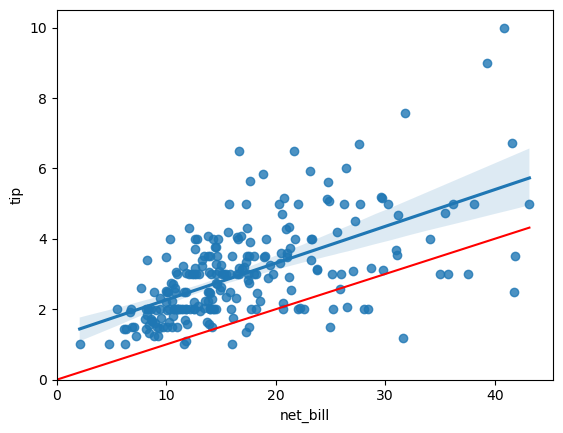

In [12]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.06e-09
Time:                        13:36:08   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

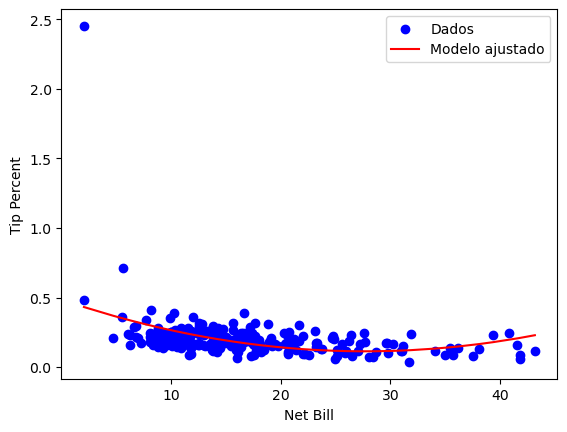

In [14]:
# criando o polinomio de segundo grau para net_bill
tips['net_bill_squared'] = tips['net_bill'] ** 2

# configurando x (termos independentes)
x = sm.add_constant(tips[['net_bill', 'net_bill_squared']]) # adiciona o intercepto
y = tips['tip_pct'] # variavel dependente

#ajustando o modelo de regressao
model = sm.OLS(y, x).fit()

# exibindo os resultados do modelo
print(model.summary())

# grafico do modelo ajustado
plt.scatter(tips['net_bill'], tips['tip_pct'], color='blue', label='Dados')
sorted_net_bill = np.sort(tips['net_bill'])
fitted_values = model.predict(sm.add_constant(pd.DataFrame( {
    'net_bill': sorted_net_bill,
    'net_bill_squared': sorted_net_bill ** 2,
})))
plt.plot(sorted_net_bill, fitted_values, color='red', label='Modelo ajustado')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percent')
plt.legend()
plt.show()

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [21]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 1', tips[:5])


DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  total_bill
          1              1             1     2       16.99
          1              0             1     3       10.34
          1              0             1     3       21.01
          1              0             1     2       23.68
          1              1             1     4       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [23]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  size  total_bill
          0            1             1     2       16.99
          1            0             1     3       10.34
          1            0             1     3       21.01
          1            0             1     2       23.68
          0            1             1     4       24.59
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

(0.0, 10.5)

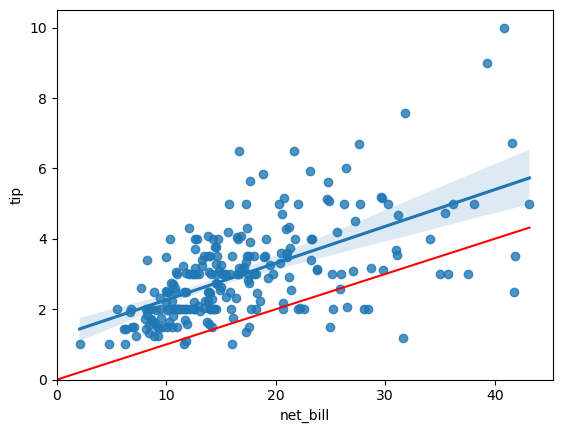

In [25]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.06e-09
Time:                        13:36:14   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

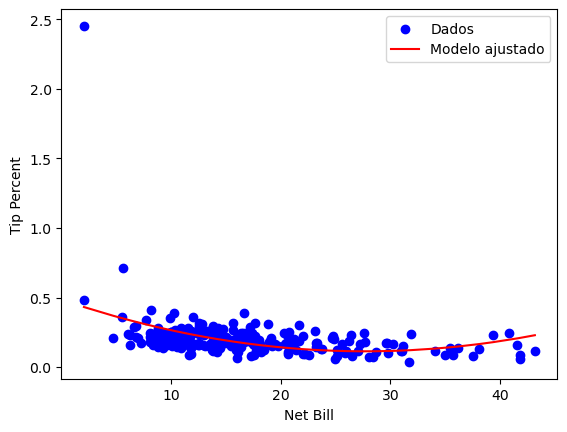

In [27]:
# configurando x (termos independentes)
x = sm.add_constant(tips[['net_bill', 'net_bill_squared']]) # adiciona o intercepto
y = tips['tip_pct'] # variavel dependente

#ajustando o modelo de regressao
model = sm.OLS(y, x).fit()

# exibindo os resultados do modelo
print(model.summary())

# grafico do modelo ajustado
plt.scatter(tips['net_bill'], tips['tip_pct'], color='blue', label='Dados')
sorted_net_bill = np.sort(tips['net_bill'])
fitted_values = model.predict(sm.add_constant(pd.DataFrame( {
    'net_bill': sorted_net_bill,
    'net_bill_squared': sorted_net_bill ** 2,
})))
plt.plot(sorted_net_bill, fitted_values, color='red', label='Modelo ajustado')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percent')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           8.27e-16
Time:                        13:36:16   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2749      0.056    -22.872      0.0

<Axes: xlabel='net_bill', ylabel='tip_pct'>

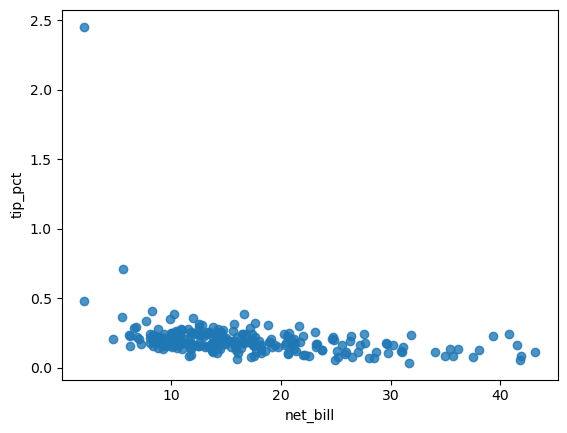

In [29]:
# Criar a variável log_tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustar modelo de regressão linear
X = sm.add_constant(tips['net_bill'])  # Adicionar intercepto
y = tips['log_tip_pct']

# Modelo usando Statsmodels
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

# Calcular R² no espaço original para tip_pct
y_pred_log = model.predict(X)  # Previsões em escala log
y_pred_tip_pct = np.exp(y_pred_log)  # Voltar ao espaço original
ss_total = np.sum((tips['tip_pct'] - tips['tip_pct'].mean()) ** 2)
ss_residual = np.sum((tips['tip_pct'] - y_pred_tip_pct) ** 2)

r2_tip_pct = 1 - (ss_residual / ss_total)
print(f"R² para tip_pct no espaço original: {r2_tip_pct:.4f}")


sns.regplot(x='net_bill', y='tip_pct', data=tips, fit_reg=False)

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [34]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

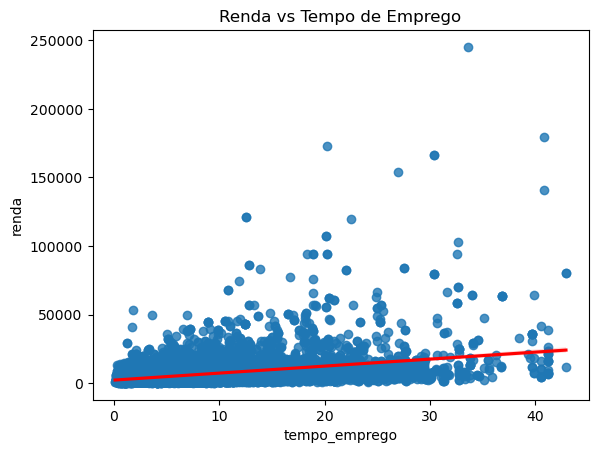

In [59]:
# Observando os dados
print(df.head())
print(df.describe())

# Verificando variáveis de interesse
print(df[['renda', 'tempo_emprego']].isnull().sum())

# Removendo valores nulos
df = df.dropna(subset=['renda', 'tempo_emprego'])

# Ajustando o modelo de regressão linear
X = df['tempo_emprego']  # Variável explicativa
y = df['renda']  # Variável resposta

# Adicionando constante para o modelo
X = sm.add_constant(X)

# Criando e ajustando o modelo
modelo = sm.OLS(y, X).fit()

# Sumário do modelo
print(modelo.summary())

# Visualizando a regressão com Seaborn
sns.regplot(x='tempo_emprego', y='renda', data=df, line_kws={'color': 'red'})
plt.title('Renda vs Tempo de Emprego')
plt.show()

In [54]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + renda + renda + 0', df[:5])
X

DesignMatrix with shape (5, 2)
  tempo_emprego    renda
        6.60274  8060.34
        7.18356  1852.15
        0.83836  2253.89
        4.84658  6600.77
        4.29315  6475.97
  Terms:
    'tempo_emprego' (column 0)
    'renda' (column 1)

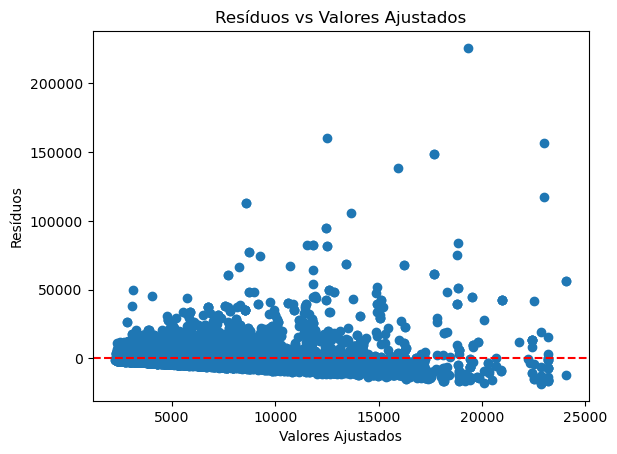

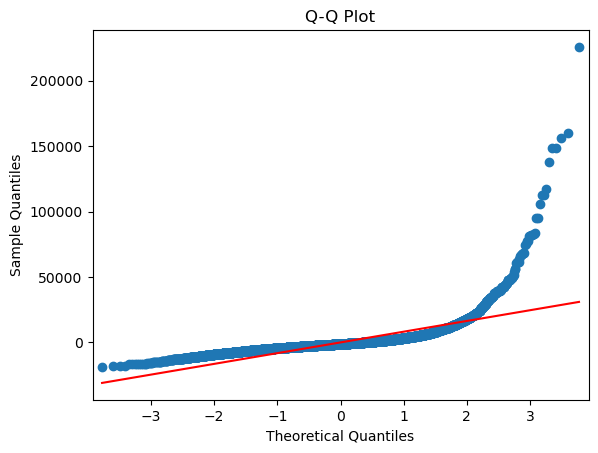

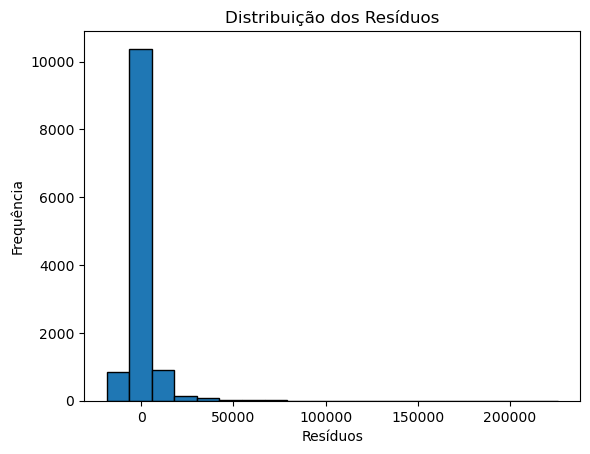

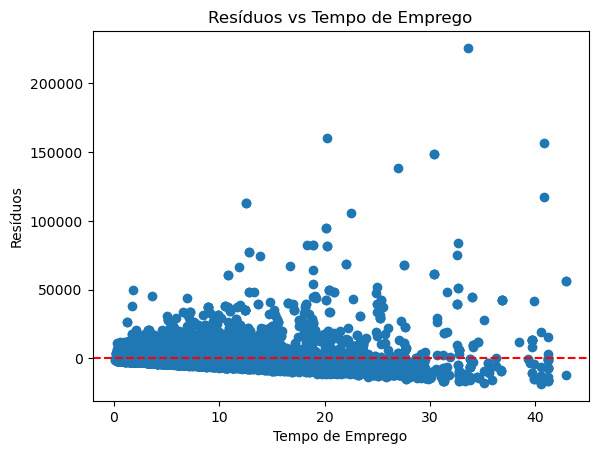

/tmp/ipykernel_6352/3406113111.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempo_emprego2'] = df['tempo_emprego'] ** 2


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

In [61]:
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()


sm.qqplot(residuos, line='s')
plt.title('Q-Q Plot')
plt.show()

plt.hist(residuos, bins=20, edgecolor='black')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

plt.scatter(df['tempo_emprego'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()

df['tempo_emprego2'] = df['tempo_emprego'] ** 2
X = sm.add_constant(df[['tempo_emprego', 'tempo_emprego2']])

influencias = modelo.get_influence()
distancia_cook = influencias.cooks_distance[0]
plt.stem(distancia_cook, markerfmt=",", use_line_collection=True)
plt.title('Distância de Cook')
plt.xlabel('Observações')
plt.ylabel('Distância de Cook')
plt.show()

modelo_robusto = sm.RLM(y, X).fit()
print(modelo_robusto.summary())

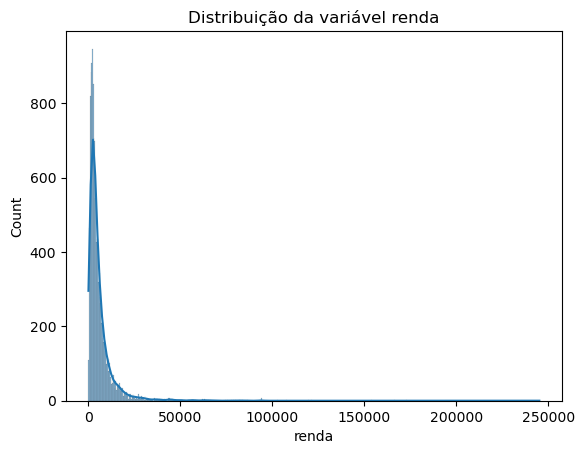

KeyError: "['experiencia'] not in index"

In [63]:
sns.histplot(df['renda'], kde=True)
plt.title("Distribuição da variável renda")
plt.show()

# Aplicar transformação log, se necessário (descomente se precisar)
# df['renda_log'] = np.log(df['renda'])
# Variável alvo: renda ou renda_log
y = df['renda']  # ou df['renda_log']

# Variáveis explicativas
X = df[['idade', 'experiencia', 'educacao']]  # Substitua pelas suas variáveis preditoras
X = sm.add_constant(X)  # Adiciona uma constante ao modelo (intercepto)

# Ajustando o modelo
modelo = sm.OLS(y, X).fit()

# Resumo dos resultados
print(modelo.summary())

# Diagnóstico dos resíduos
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Diagnóstico dos Resíduos")
plt.show()

In [65]:
# Ajustar o modelo inicial
X = sm.add_constant(X)  # Adiciona o intercepto ao modelo
modelo_inicial = sm.OLS(y, X).fit()

# Ver os resultados iniciais
print(modelo_inicial.summary())  # Para observar os p-valores

# Identificar variável com alto p-valor, removê-la e reajustar
X = X.drop(columns=['nome_da_variavel_com_p_valor_alto'])  # Remova a variável não significante
modelo_ajustado = sm.OLS(y, X).fit()

# Reajustar e interpretar novamente
print(modelo_ajustado.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Tue, 31 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:01:23   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2965.3374    151.248     19.

KeyError: "['nome_da_variavel_com_p_valor_alto'] not found in axis"